In [2]:
import numpy as np
import pandas as pd
import pyswarms as ps
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import PSONN
import classicNN
from commonsetup import PreprocessData

In [2]:
iris=PreprocessData('iris')

iris_nn_result=classicNN.run(iris)

== Loading Iris Data ...
== [ 150 Instances, 4 Dimensions, 3 classes ]
== ===========================================
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Epoch 0, Loss: 1.0985
Epoch 100, Loss: 1.0959
Epoch 200, Loss: 1.0835
Epoch 300, Loss: 1.0319
Epoch 400, Loss: 0.9142
Epoch 500, Loss: 0.8051
Epoch 600, Loss: 0.7334
Epoch 700, Loss: 0.6804
Epoch 800, Loss: 0.6388
Epoch 900, Loss: 0.6053
Epoch 1000, Loss: 0.5776
Epoch 1100, Loss: 0.5543
Epoch 1200, Loss: 0.5343
Epoch 1300, Loss: 0.5167
Epoch 1400, Loss: 0.5008
Epoch 1500, Loss: 0.4857
Epoch 1600, Loss: 0.4722
Epoch 1700, Loss: 0.4594
Epoch 1800, Loss: 0.4470
Epoch 1900, Loss: 0.4348
Epoch 2000, Loss: 0.4226
Epoch 2100, Loss: 0.4104
Epoch 2200, Loss: 0.3980
Epoch 2300, Loss: 0.3854
Epoch 2400, Loss: 0.3726
Epoch 2500, Loss: 0.3595
Epoch 2600, Loss: 0.3463
Epoch 2700, Loss: 0.3329
Epoch 2800, Loss: 0.3195
Epoch 2900, Loss: 0.3059
Epoch 3000, Loss: 0.2925
Epoch 3100, Loss: 0.2792
Epoch 3200, Loss: 0.2663
Epoch 

In [14]:
iris_params = {
    'c1': 3,
    'c2': 1,
    'w': 0.3,
    'velocity': (-0.5, 0.5),
    'swarm_size': 10,
    'batch_size': 20}

iris_pso_result = PSONN.run(iris, iris_params)

############ you are using the following settings:
Number hidden layers:  4
activation:  <function relu at 0x0000027D4FA81BC0>
Number of variables to optimize:  35
PSO parameters C1:  3 C2:  1 W:  0.3 Swarmsize:  10 Iteration:  10000


Best Weights Found: [0.88096257 0.60391687 0.3860522  0.92347777 0.05888156 0.18317096
 0.21111294 0.31253074 0.66744488 0.25963472]
Accuracy PSO-NN: 0.97


            Classic NN     PSO NN
Accuracy      1.000000   0.966667
Train time    1.283412  41.652310
Fit time      0.000000   0.000000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



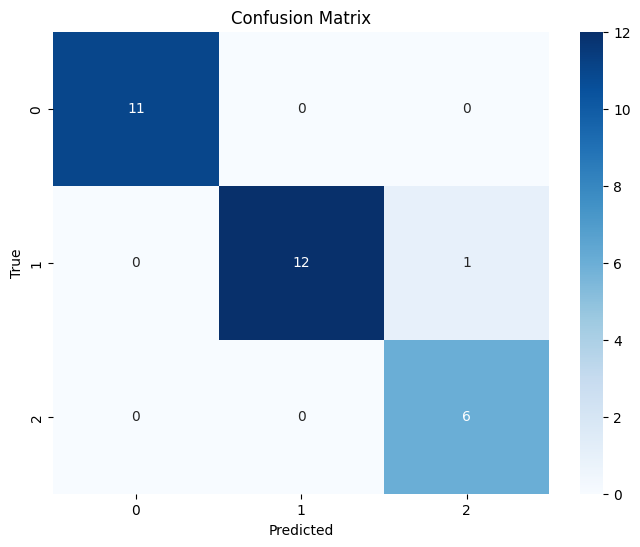

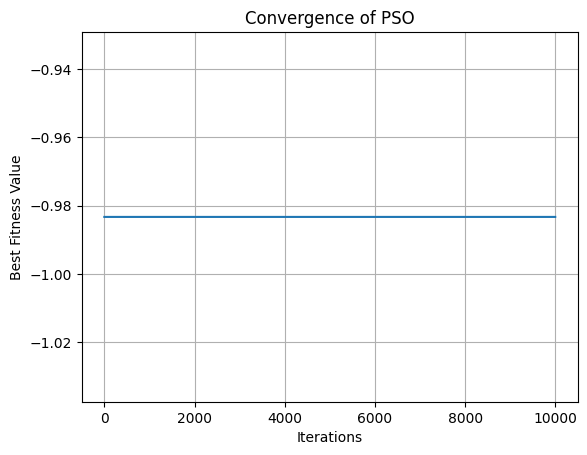

In [15]:
print(pd.DataFrame(data={'Classic NN':[accuracy_score(iris_nn_result[0],iris_nn_result[1]),iris_nn_result[2],iris_nn_result[3]],
                            'PSO NN':[accuracy_score(iris_pso_result[1],iris_pso_result[2]),iris_pso_result[3],iris_pso_result[4]]},
                            index=['Accuracy','Train time','Fit time']))
iris_pso_result[0].visualize(iris_pso_result[1],iris_pso_result[2])

In [3]:
digits=PreprocessData('digits')

digits_nn_result=classicNN.run(digits)

== Loading Digits Data ...
== [ 3823 Instances, 16 Dimensions, 10 classes ]
== ===========================================
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Epoch 0, Loss: 2.3027
Epoch 100, Loss: 2.3022
Epoch 200, Loss: 2.3017
Epoch 300, Loss: 2.3012
Epoch 400, Loss: 2.3007
Epoch 500, Loss: 2.3003
Epoch 600, Loss: 2.2998
Epoch 700, Loss: 2.2993
Epoch 800, Loss: 2.2988
Epoch 900, Loss: 2.2983
Epoch 1000, Loss: 2.2978
Epoch 1100, Loss: 2.2973
Epoch 1200, Loss: 2.2968
Epoch 1300, Loss: 2.2962
Epoch 1400, Loss: 2.2956
Epoch 1500, Loss: 2.2950
Epoch 1600, Loss: 2.2944
Epoch 1700, Loss: 2.2937
Epoch 1800, Loss: 2.2930
Epoch 1900, Loss: 2.2923
Epoch 2000, Loss: 2.2915
Epoch 2100, Loss: 2.2907
Epoch 2200, Loss: 2.2898
Epoch 2300, Loss: 2.2889
Epoch 2400, Loss: 2.2879
Epoch 2500, Loss: 2.2869
Epoch 2600, Loss: 2.2858
Epoch 2700, Loss: 2.2847
Epoch 2800, Loss: 2.2834
Epoch 2900, Loss: 2.2822
Epoch 3000, Loss: 2.2808
Epoch 3100, Loss: 2.2794
Epoch 3200, Loss: 2.2779
E

In [11]:
digits_params = {
    'c1': 1,
    'c2': 3,
    'w': 0.8,
    'velocity': (-2, 2),
    'swarm_size': 10,
    'batch_size': 20}

digits_pso_result = PSONN.run(digits, digits_params)

############ you are using the following settings:
Number hidden layers:  32
activation:  <function sigmoid at 0x00000273A1B87600>
Number of variables to optimize:  874
PSO parameters C1:  1 C2:  3 W:  0.8 Swarmsize:  10 Iteration:  10000


Best Weights Found: [-0.74858807  3.14064348 -1.57138754 -0.17677053 -0.45613127 -7.37696298
  4.95620234  4.86574787  3.02203948  6.05376767]
Accuracy PSO-NN: 0.45


            Classic NN      PSO NN
Accuracy      0.418301    0.449673
Train time   64.694699  581.151982
Fit time      0.000000    0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.85      0.63        81
           1       0.00      0.00      0.00        76
           2       0.45      0.95      0.61        56
           3       0.00      0.00      0.00        93
           4       0.44      0.81      0.57        79
           5       0.37      0.53      0.44        87
           6       0.00      0.00      0.00        68
           7       0.65      0.90      0.76        82
           8       0.00      0.00      0.00        55
           9       0.29      0.43      0.35        88

    accuracy                           0.45       765
   macro avg       0.27      0.45      0.34       765
weighted avg       0.28      0.45      0.34       765



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

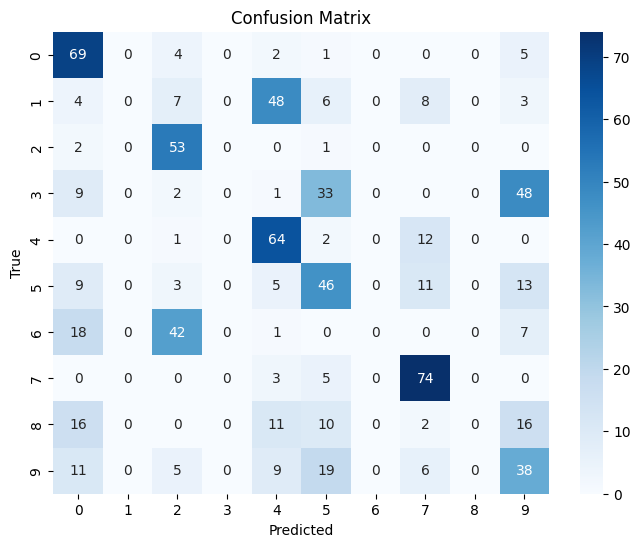

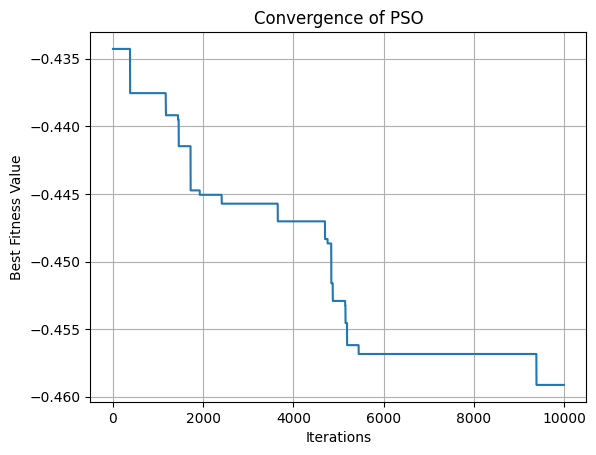

In [12]:
print(pd.DataFrame(data={'Classic NN':[accuracy_score(digits_nn_result[0],digits_nn_result[1]),digits_nn_result[2],digits_nn_result[3]],
                            'PSO NN':[accuracy_score(digits_pso_result[1],digits_pso_result[2]),digits_pso_result[3],digits_pso_result[4]]},
                            index=['Accuracy','Train time','Fit time']))
digits_pso_result[0].visualize(digits_pso_result[1],digits_pso_result[2])